# AE

## Простой автоэнкодер

*Разбор данного раздела:* https://youtu.be/b0MYIcNjNPA?t=2264



In [ ]:
from tensorflow.keras.datasets import fashion_mnist # загружаем готовую базу mnist(fashion- с одеждой, обувью и т.п)
import numpy as np # загружаем библиотеку для работы с массивами данных

#(x_train, y_train), (x_test, y_test) = mnist.load_data() # загружаем данные из базы с разбивкой на train/test
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # загружаем данные из базы с разбивкой на train/test
x_train = x_train.astype('float32') / 255. # представляем x_train в виде значений от 0 до 1
x_test  = x_test .astype('float32') / 255. # представляем x_test в виде значений от 0 до 1
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) # меняем форму, приводим к нужным нам размерам
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1)) # меняем форму, приводим к нужным нам размерам

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.datasets import mnist # загружаем готовую стандартную базу рукописных цифр mnist
import numpy as np # загружаем библиотеку для работы с массивами данных

(x_train, y_train), (x_test, y_test) = mnist.load_data() # загружаем данные из базы с разбивкой на train/test

x_train = x_train.astype('float32') / 255. # представляем x_train в виде значений от 0 до 1
x_test  = x_test .astype('float32') / 255. # представляем x_test в виде значений от 0 до 1
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) # меняем форму, приводим к нужным нам размерам
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1)) # меняем форму, приводим к нужным нам размерам

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
import seaborn as sns # более высокоуровневое API на базе библиотеки matplotlib
import matplotlib.pyplot as plt # из библиотеки для визуализации данных возьмём интерфейс для построения графиков простых функций

def plot_digits(*args): # функция отрисует две линии картинок - оригинальные и выходные из автокодировщика
    args = [x.squeeze() for x in args] # удаляем оси с одним элементом из аргументов
    n = min([x.shape[0] for x in args]) # берем минимальное от нулевой оси x'ов в аргументах
    
    plt.figure(figsize=(2*n, 2*len(args))) # плотим фигуру с заданными значениями
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i*n + j + 1) # задаем параметры и создаем сабплоты
            plt.imshow(args[i][j]) # выведем картинку
            plt.gray() # в черно-белых цветах 
            ax.get_xaxis().set_visible(False) # ось координат xaxis делаем невидимой
            ax.get_yaxis().set_visible(False) # ось координат yaxis делаем невидимой

    plt.show() # выводим отрисованное на экран

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape # загружаем необходимые слои
from tensorflow.keras.models import Model # загружаем абстрактный класс базовой модели сети от кераса

def create_dense_ae(): # объявляем функцию создания автокодировщика
    # Размерность кодированного представления
    encoding_dim = 49

    # Энкодер
    # Входной плейсхолдер
    input_img = Input(shape=(28, 28, 1)) # 28, 28, 1 - размерности строк, столбцов, фильтров одной картинки, без батч-размерности
    # Вспомогательный слой решейпинга
    flat_img = Flatten()(input_img)
    # Кодированное полносвязным слоем представление
    encoded = Dense(encoding_dim, activation='relu')(flat_img)
    
    # Декодер
    # Раскодированное другим полносвязным слоем изображение
    input_encoded = Input(shape=(encoding_dim,)) # задаем входную размерность (49,)
    flat_decoded = Dense(28*28, activation='sigmoid')(input_encoded) # далее полносвязный слой на 784 нейрона
    decoded = Reshape((28, 28, 1))(flat_decoded) # меняем форму, приводим к нужным нам размерам

    # Модели, в конструктор первым аргументом передаются входные слои, а вторым выходные слои
    # Другие модели можно так же использовать как и слои
    encoder = Model(input_img, encoded, name="encoder")
    
    decoder = Model(input_encoded, decoded, name="decoder")
    
    # Построим модель автокодировщика (внутри двойное преобразование - сжатие/разжатие)
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder # функция вернет 3 собранные сетки

In [ ]:
encoder, decoder, autoencoder = create_dense_ae() # создаем три сетки с помощью заданной ранее функции
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') # компилируем модель с выбранным оптимайзером и функцией потерь 

In [ ]:
autoencoder.summary() # взглянем на информацию о полученной модели автокодировщика

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 49)                38465     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         39200     
Total params: 77,665
Trainable params: 77,665
Non-trainable params: 0
_________________________________________________________________


In [ ]:
decoder.summary() # отдельно взглянем на информацию о декодере

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 49)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               39200     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
Total params: 39,200
Trainable params: 39,200
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test)) # грузим наши данные в модель, задаем параметры и обучаем

Epoch 1/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2588 - val_loss: 0.1732
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1545 - val_loss: 0.1372
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1280 - val_loss: 0.1175
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1125 - val_loss: 0.1055
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1026 - val_loss: 0.0974
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0956 - val_loss: 0.0917
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0906 - val_loss: 0.0875
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0871 - val_loss: 0.0848
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0846 - val_loss: 0.0827
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0830 - val_lo

In [ ]:
n = 15 # выбираем количество картинок
imgs = x_test[:n] # взяли первые 10 от x_test
encoded_imgs = encoder.predict(imgs, batch_size=n) # перевели их энкодером в скрытое пространство
encoded_imgs[1] # взглянем на форму выбранной картинки в скрытом пространстве

array([ 8.400064 ,  8.671006 ,  9.482612 ,  0.6728795,  1.2079524,
        7.316613 ,  6.391011 ,  0.       ,  8.506462 ,  2.2354963,
        6.5366106,  5.5553637,  5.957983 ,  7.323778 , 10.836955 ,
       11.0927305,  7.310502 , 10.39499  ,  4.9613996,  9.236986 ,
        3.139421 , 11.681869 , 12.251273 , 10.779811 , 10.813509 ,
        9.119356 , 11.465595 ,  8.2785845,  8.773198 ,  7.6397233,
        9.816214 ,  7.207908 , 21.76927  ,  8.587539 ,  2.2882223,
       10.936399 , 11.207011 ,  9.252575 ,  9.25257  ,  9.190441 ,
       10.538395 ,  7.207472 ,  1.7514768,  3.706589 ,  8.391071 ,
        6.7613907,  4.5727983,  2.053224 , 13.853559 ], dtype=float32)

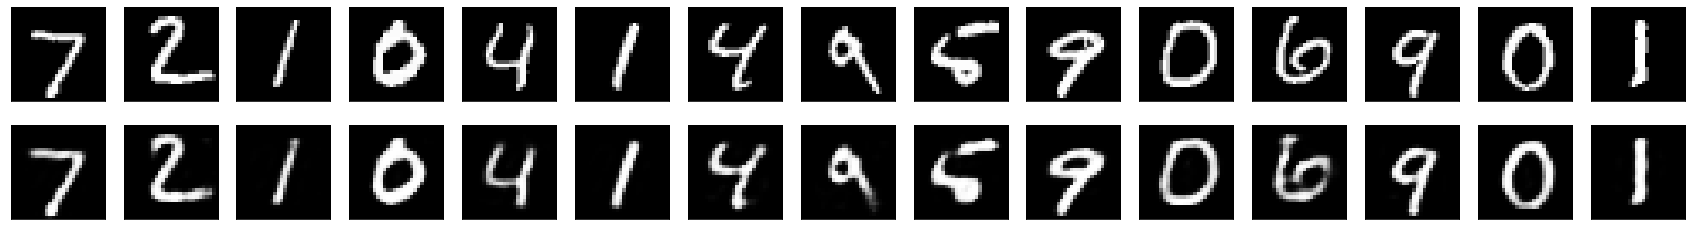

In [ ]:
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n) # делаем преобразование этих картинок декодером

plot_digits(imgs, decoded_imgs) # взглянем как преобразовал картинки обычный автокодировщик

## Сверточный автоэнкодер

*Разбор данного раздела:* https://youtu.be/b0MYIcNjNPA?t=3045


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose # загружаем слои для свертки

def create_deep_conv_ae(): # объявляем функцию создания глубокого сверточного автокодировщика
    input_img = Input(shape=(28, 28, 1)) # размерности строк, столбцов, фильтров одной картинки, без батч-размерности

    x = Conv2D(128, (7, 7), activation='relu', padding='same')(input_img) # входные данные передаем на слой двумерной свёртки
    x = MaxPooling2D((2, 2), padding='same')(x) # передаём на слой подвыборки, снижающий размерность поступивших на него данных
    x = Conv2D(32, (2, 2), activation='relu', padding='same')(x) # второй слой двумерной свёртки
    x = MaxPooling2D((2, 2), padding='same')(x) # второй слой подвыборки
    
    encoded = Conv2D(1, (7, 7), activation='relu', padding='same')(x) # финальный слой свертки энкодера. Сжали в пространство 7на7

    # На этом моменте представление  (7, 7, 1) т.е. 49-размерное

    input_encoded = Input(shape=(7, 7, 1)) # задаем эти размеры как входные в декодер
    x = Conv2D(32, (7, 7), activation='relu', padding='same')(input_encoded) # входные данные передаем на слой двумерной свёртки
    x = UpSampling2D((2, 2))(x)  # Conv2DTranspose. Cлой разжимает данные, стало 14на14
    x = Conv2D(128, (2, 2), activation='relu', padding='same')(x) # второй слой двумерной свёртки
    x = UpSampling2D((2, 2))(x) # второй слой разжатия данных, стало 28на28
    decoded = Conv2D(1, (7, 7), activation='sigmoid', padding='same')(x) # финальный слой свертки энкодера

    # Модели
    encoder = Model(input_img, encoded, name="encoder") # задаем модель энкодера(сжатие картинки)
    decoder = Model(input_encoded, decoded, name="decoder") # задаем модель декодера(разжатие картинки)
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder") # задаем модель автокодировщика(сжатие-разжатие)
    return encoder, decoder, autoencoder # функция возвращает 3 сетки

c_encoder, c_decoder, c_autoencoder = create_deep_conv_ae() # создаем три сетки с помощью заданной ранее функции
c_autoencoder.compile(optimizer='adam', loss='binary_crossentropy') # компилируем модель с выбранным оптимайзером и функцией потерь

c_autoencoder.summary() # взглянем на информацию о полученной модели сверточного автокодировщика

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Model)              (None, 7, 7, 1)           24385     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         24385     
Total params: 48,770
Trainable params: 48,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
c_decoder.summary() # отдельно взглянем на информацию о декодере

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 7, 7, 1)]         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          1600      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       16512     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 1)         6273      
Total params: 24,385
Trainable params: 24,385
Non-trainable params: 0
_______________________________________________________

In [ ]:
c_autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test)) # грузим наши данные в модель, задаем параметры и обучаем

Epoch 1/50
235/235 [==============================] - 21s 91ms/step - loss: 0.1839 - val_loss: 0.1003
Epoch 2/50
235/235 [==============================] - 21s 88ms/step - loss: 0.0950 - val_loss: 0.0895
Epoch 3/50
235/235 [==============================] - 21s 88ms/step - loss: 0.0879 - val_loss: 0.0850
Epoch 4/50
235/235 [==============================] - 21s 88ms/step - loss: 0.0846 - val_loss: 0.0836
Epoch 5/50
235/235 [==============================] - 21s 88ms/step - loss: 0.0825 - val_loss: 0.0806
Epoch 6/50
235/235 [==============================] - 21s 88ms/step - loss: 0.0809 - val_loss: 0.0790
Epoch 7/50
235/235 [==============================] - 21s 88ms/step - loss: 0.0799 - val_loss: 0.0781
Epoch 8/50
235/235 [==============================] - 21s 88ms/step - loss: 0.0789 - val_loss: 0.0786
Epoch 9/50
235/235 [==============================] - 21s 88ms/step - loss: 0.0780 - val_loss: 0.0765
Epoch 10/50
235/235 [==============================] - 21s 89ms/step - loss: 0.077

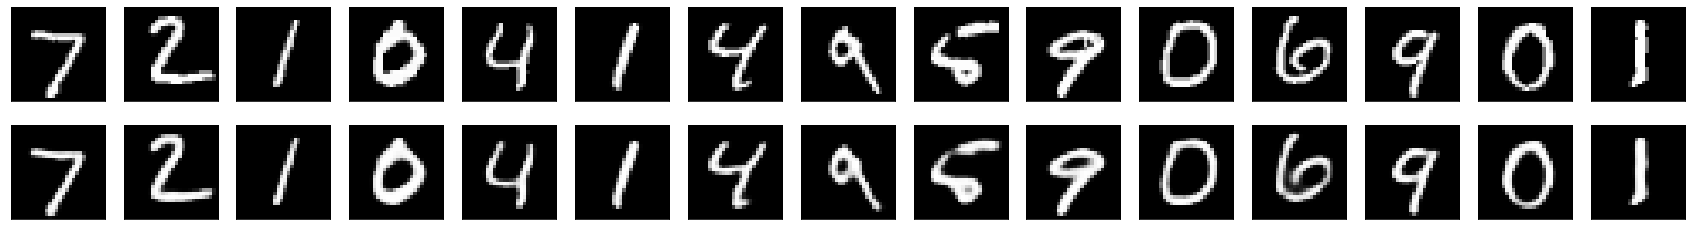

In [ ]:
n = 15 # выбираем количество картинок

imgs = x_test[:n] # взяли первые 10 от x_test
encoded_imgs = c_encoder.predict(imgs, batch_size=n) # делаем преобразование энкодером
decoded_imgs = c_decoder.predict(encoded_imgs, batch_size=n) # делаем преобразование декодером

plot_digits(imgs, decoded_imgs) # взглянем как преобразовал картинки сверточный автокодировщик

## Почему автоэнкодеры не используют для генерации изображений

*Разбор данного раздела:* https://youtu.be/b0MYIcNjNPA?t=3199


In [ ]:
def add_noise(x,k): # создаем функцию добавления шума
  x = x + k*np.random.normal(0, 1, x.shape) # получили x и прибавили к нему какое-то numpy нормальное распределение от 0 до 1
  return x # функция вернет x с добавлением шума

def add_img_func(x1,x2,k): # создаем функцию смешения картинок
  x = x1*k + x2*(1-k) # смешиваем x1 с коэф-том k, и x2 с коэф-том (1-k)
  return x # функция вернёт результат смешения

In [ ]:
n = 10 # выбираем количество картинок

imgs = x_test[:n] # взяли первые 10 от x_test
encoded_imgs = encoder.predict(imgs, batch_size=n) # делаем преобразование энкодером
print(encoded_imgs[0]) # взглянем на форму выбранной картинки в скрытом пространстве

add_img = x_test[n] # добавили 11ю картинку
encoded_add_img = encoder.predict(np.array([add_img])) # преобразовываем энкодером
print(encoded_add_img[0]) # выводим на экран

[ 5.4922967  3.346169   4.350114   5.315992  18.04647    8.198238
  9.118443  11.316879  10.39049    7.9357214  4.241999   3.0648794
  7.439352   3.730774   6.4619226  3.4910388  2.49073    5.191484
  6.4328012  3.6874926  2.2986364  6.3568573  4.61703    5.641386
  9.389064   6.8319354  1.5419016  9.492244   0.6281072  5.6670017
  5.4589214  5.3257885  1.0165033  2.729167   6.7964215  8.078167
  5.1374073  2.8069339  6.123106   1.3872216  5.374256   7.8498707
  2.04625    3.5616877 10.772612   6.454199   3.9129758  5.7899323
  7.9717093]
[ 6.1278687  6.1191406  6.490735   6.813888   2.797863   5.6307287
  5.7194386  4.0235415 15.203354   5.6813183 10.637544  13.393028
  6.5423856 12.821337   7.86506    7.330482   6.2834105 10.72636
 11.137362   8.134038   9.062401  12.907478  13.103      8.279542
  4.389235   8.355901   2.9822505  6.305851   3.9484525 19.583017
  7.3846173  8.741968   4.4029493 12.604322  15.592601  16.9336
 10.964021   5.994677  10.261665   4.817575  10.218435   1.48

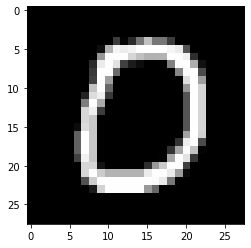

In [ ]:
plt.imshow(x_test[n].reshape((28,28)))

In [ ]:
encoded_imgs_with_noise = add_noise(encoded_imgs, 4) # добавили шума к обычным картинкам в скрытом пространстве 
encoded_imgs_with_noise[0] # взглянем на форму выбранной картинки с добавлением шума

array([ 5.23569006,  1.18490541,  4.16373449,  3.39622414, 18.25477997,
        1.83288895,  5.04320848,  4.6945158 ,  9.69026146, 10.98373296,
       11.45815526, -3.8386903 ,  2.61273981,  3.19670445, 11.4613462 ,
        3.4765954 , -0.54446468,  3.65970057,  7.90107948,  4.66382028,
       -2.47245642,  6.32416304,  9.63387957,  4.80603626, 12.15843437,
       10.81432459, -4.94057039,  7.89734861,  2.90559339,  8.26282572,
        9.72464175,  7.2705378 ,  0.47232424,  4.43661571,  7.20972909,
        8.45693089,  7.10754617,  2.66651942,  9.66138675, -5.6661226 ,
        1.48654118,  6.67930093, -4.81979237,  3.56089135,  9.54210444,
        6.67254623, -0.83753271,  9.73098474,  8.06067502])

In [ ]:
encoded_imgs_with_noise2 = add_img_func(encoded_imgs, encoded_add_img, 0.5) # добавляем смещение

In [ ]:
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n) # преобразовываем декодером обычные картинки
decoded_imgs_with_add = decoder.predict(encoded_imgs_with_noise2, batch_size=n) # преобразовываем декодером картинки со смещением

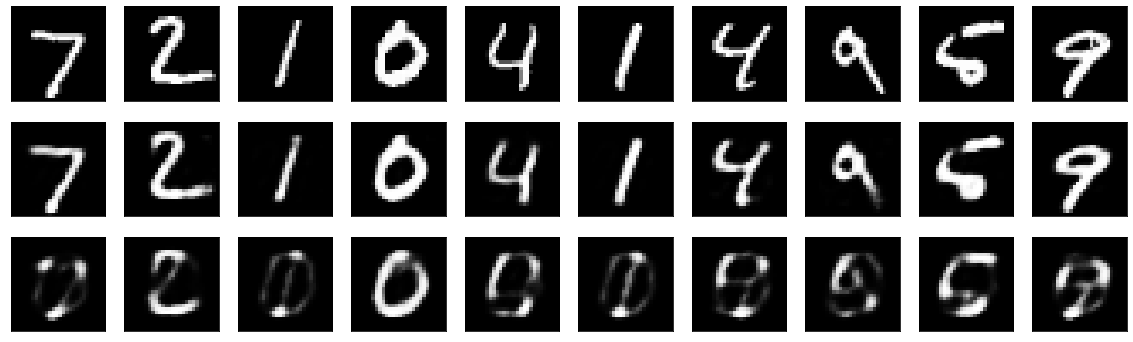

In [ ]:
plot_digits(imgs, decoded_imgs, decoded_imgs_with_add)  # взглянем на результаты преобразования

In [ ]:
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n) # преобразовываем декодером обычные картинки
decoded_imgs_with_noise = decoder.predict(encoded_imgs_with_noise, batch_size=n) # преобразовываем декодером зашумленные картинки

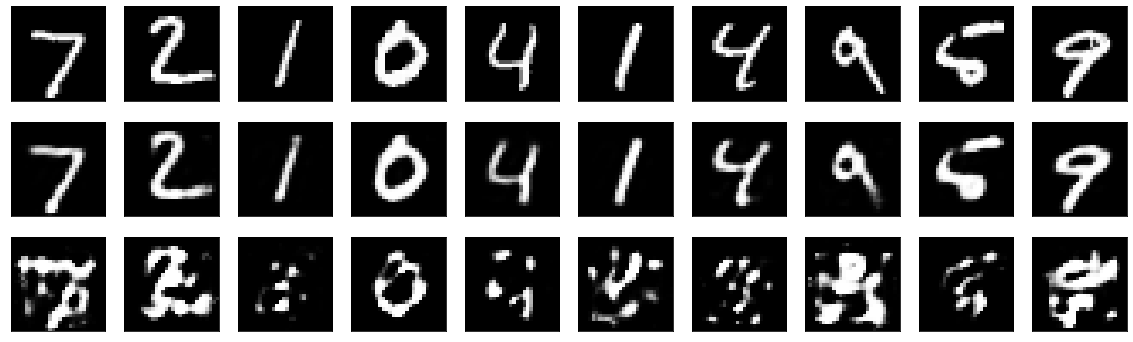

In [ ]:
plot_digits(imgs,decoded_imgs, decoded_imgs_with_noise) # взглянем на результаты преобразования

# VAE

*Теоретический материал:* https://youtu.be/b0MYIcNjNPA?t=3784

*Разбор данного раздела:* https://youtu.be/b0MYIcNjNPA?t=5240

In [ ]:
!pip install keras==2.0 -q # загружаем эту версию кераса для корректной работы скрипта
!pip install tensorflow==1.0 -q  # загружаем эту версию тензорфлоу  для корректной работы скрипта

     |████████████████████████████████| 194kB 9.8MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.0.0 which is incompatible.
     |████████████████████████████████| 44.5MB 69kB/s 


In [ ]:
import sys # модуль содержит параметры и функции, которые относятся к Python и его среде
import numpy as np # загружаем библиотеку для работы с массивами данных
import matplotlib.pyplot as plt # из библиотеки для визуализации данных возьмём интерфейс для построения графиков простых функций
import seaborn as sns # более высокоуровневое API на базе библиотеки matplotlib
from scipy.stats import norm # модуль с нормальными непрерывными случайными величинами
#from keras.datasets import fashion_mnist # загружаем готовую базу mnist(fashion- с одеждой, обувью и т.п)

from keras.datasets import mnist # загружаем готовую стандартную базу рукописных цифр mnist
from keras.optimizers import Adam, RMSprop # загружаем выбранные оптимизаторы
from keras.layers import Input, Dense  # загружаем необходимые слои(входной, полносвязный)
from keras.layers import BatchNormalization, Dropout, Flatten, Reshape, Lambda # загружаем слои(нормализации, регуляризации и т.д)
from keras.models import Model # загружаем абстрактный класс базовой модели сети от кераса

from keras.objectives import binary_crossentropy # импортируем функцию потерь
from keras.layers.advanced_activations import LeakyReLU # импортируем функцию активации отдельным слоем
from keras import backend as K # устанавливаем переменную для окружения кераса
from IPython.display import clear_output # импортируем модуль очистки output'а ячейки
from keras.callbacks import LambdaCallback, ReduceLROnPlateau, TensorBoard # импортируем коллбэки

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # загружаем данные из базы mnist с разбивкой на train/test
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # загружаем данные из базы fashion_mnist с разбивкой на train/test

x_train = x_train.astype('float32') / 255. # представляем x_train в виде значений от 0 до 1
x_test  = x_test .astype('float32') / 255. # представляем x_test в виде значений от 0 до 1
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) # меняем форму, приводим к нужным нам размерам
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1)) # меняем форму, приводим к нужным нам размерам

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
batch_size = 500 # размер батча
latent_dim = 10 # размер скрытого слоя/пространства
dropout_rate = 0.3 # размер слоя регуляризации, "выключим" указанное количество нейронов, во избежание переобучения
start_lr = 0.0001 # шаг обучения

In [ ]:

def create_vae(): # объявляем функцию создания вариационного автокодировщика
    models = {} # задаем словарь моделей

    # Добавим Dropout и BatchNormalization
    def apply_bn_and_dropout(x): # функция будет принимать на вход слой x
        return Dropout(dropout_rate)(BatchNormalization()(x)) # и применять к нему регуляризацию/нормализацию

    # Энкодер
    input_img = Input(batch_shape=(batch_size, 28, 28, 1)) # размерности батч, строк, столбцов, фильтров одной картинки
    x = Flatten()(input_img) # добавляем слой выравнивания/сглаживания ("сплющиваем" данные в вектор)
    x = Dense(256, activation='relu')(x) # полносвязный слой на 256 нейронов
    x = apply_bn_and_dropout(x) # применяем функцию добавления регуляризации/нормализации
    x = Dense(128, activation='relu')(x) # полносвязный слой на 128 нейронов
    x = apply_bn_and_dropout(x) # применяем функцию добавления регуляризации/нормализации

    # Предсказываем параметры распределений
    # Вместо того, чтобы предсказывать стандартное отклонение, предсказываем логарифм вариации
    
    z_mean = Dense(latent_dim)(x) # скрытое пространство(мат.ожидание) размером 10
    
    z_log_var = Dense(latent_dim)(x) # скрытое пространство(лог.вариации) размером 10

    # Сэмплирование из Q с трюком репараметризации
    def sampling(args): # обьявляем функцию сэмплирования
        z_mean, z_log_var = args # принимаем в аргументах z_mean, z_log_var, раскусываем их
        
        # Керасовским методом делаем нормальное распределение(500 10тимерных), мат.ожидание 0, ст.отклонение 1
        epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.0)
        
        return z_mean + K.exp(z_log_var / 2) * epsilon

    # Задаем самописный слой, к-й принимает лист [z_mean, z_log_var], семплирует, и на выходе выдает размерность (10,)
    l = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    models["encoder"]  = Model(input_img, l, 'Encoder') # модель энкодера от входа до лямбда слоя
    
    models["z_meaner"] = Model(input_img, z_mean, 'Enc_z_mean') # отдельная модель с путем от входа до z_mean
    
    models["z_lvarer"] = Model(input_img, z_log_var, 'Enc_z_log_var') # отдельная модель с путем от входа до z_log_var

    # Декодер
    z = Input(shape=(latent_dim, )) # задаем входную размерность (10,)
    x = Dense(128)(z) # полносвязный слой на 128 нейронов
    x = LeakyReLU()(x) # применяем функцию активации отдельным слоем
    x = apply_bn_and_dropout(x) # применяем функцию добавления регуляризации/нормализации
    x = Dense(256)(x) # полносвязный слой на 256 нейронов
    x = LeakyReLU()(x) # применяем функцию активации отдельным слоем
    x = apply_bn_and_dropout(x) # применяем функцию добавления регуляризации/нормализации
    x = Dense(28*28, activation='sigmoid')(x) # полносвязный слой на 784 нейрона
    decoded = Reshape((28, 28, 1))(x) # меняем форму, приводим к нужным нам размерам

    models["decoder"] = Model(z, decoded, name='Decoder') # собираем модель декодера
    
    # Cобираем вариационный автокодировщик, также двойное преобразование над входной картинкой(энкодер-декодер)
    models["vae"] = Model(input_img, models["decoder"](models["encoder"](input_img)), name='VAE')

    def vae_loss(x, decoded): # объявляем самописную функцию потерь
        x = K.reshape(x, shape=(batch_size, 28*28)) # меняем размеры(в одномерный) x через керасовскую функцию
        decoded = K.reshape(decoded, shape=(batch_size, 28*28)) # меняем размеры(в одномерный) decoded через керасовскую функцию
        xent_loss = 28*28*binary_crossentropy(x, decoded) # берем бинарную кроссэнтропию между x и decoded, с учетом пикселей
        kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1) # по формуле устанавливаем ошибку kl_loss
        return (xent_loss + kl_loss)/2/28/28 # функция вернет суммарную ошибку с учетом распределения и размеров пикселей

    return models, vae_loss

models, vae_loss = create_vae() # получаем модели и свою функцию потерь
vae = models["vae"] # задаем модель вариационного автокодировщика

NotImplementedError: ignored

In [ ]:
vae.compile(optimizer=Adam(start_lr), loss=vae_loss) # компилируем модель с выбранным оптимайзером и своей функцией потерь

In [ ]:
digit_size = 28 # задаем размеры цифр

def plot_digits(*args, invert_colors=False): # функция отрисует две линии картинок - оригинальные и выходные из автокодировщика
    args = [x.squeeze() for x in args]  # удаляем оси с одним элементом из аргументов
    n = min([x.shape[0] for x in args]) # берем минимальное от нулевой оси x'ов в аргументах
    figure = np.zeros((digit_size * len(args), digit_size * n)) # создаем фигуру с использованием массива нулей по заданным размерам

    for i in range(n):
        for j in range(len(args)): # заполняем фигуру значениями
            figure[j * digit_size: (j + 1) * digit_size,
                   i * digit_size: (i + 1) * digit_size] = args[j][i].squeeze()

    if invert_colors: # если значение invert_colors будет True
        figure = 1-figure # то фигуру делаем обратной

    plt.figure(figsize=(2*n, 2*len(args))) # плотим фигуру с заданными значениями
    plt.imshow(figure, cmap='Greys_r') # выведем ее на экран в указанных цветах
    plt.grid(False) # указываем, что сетка не нужна
    ax = plt.gca() # получаем текущий объект Axes
    ax.get_xaxis().set_visible(False) # ось координат xaxis делаем невидимой
    ax.get_yaxis().set_visible(False) # ось координат yaxis делаем невидимой
    plt.show() # выводим отрисованное на экран

n = 15 # Картинка с 15x15 цифр
digit_size = 28


In [ ]:
# Массивы, в которые будем сохранять результаты, для последующей визуализации
latent_distrs = []
epochs = []

# Эпохи, в которые будем сохранять
save_epochs = set([i*5 for i in range(0,25)])

# Отслеживать будем на вот этих цифрах
imgs = x_test[:batch_size]
n_compare = 10

# Модели
generator      = models["decoder"]
encoder_mean   = models["z_meaner"]

# Функция, которую будем запускать после каждой эпохи
def on_epoch_end(epoch, logs):
    if epoch in save_epochs:
        clear_output() # Не захламляем output

        # Сравнение реальных и декодированных цифр
        decoded = vae.predict(imgs, batch_size=batch_size)
        plot_digits(imgs[:n_compare], decoded[:n_compare])

        # Сохранение многообразия и распределения z для создания анимации после
        epochs.append(epoch)
        #figs.append(figure)
        latent_distrs.append(encoder_mean.predict(x_test, batch_size))
        
# Коллбэки
pltfig = LambdaCallback(on_epoch_end=on_epoch_end)

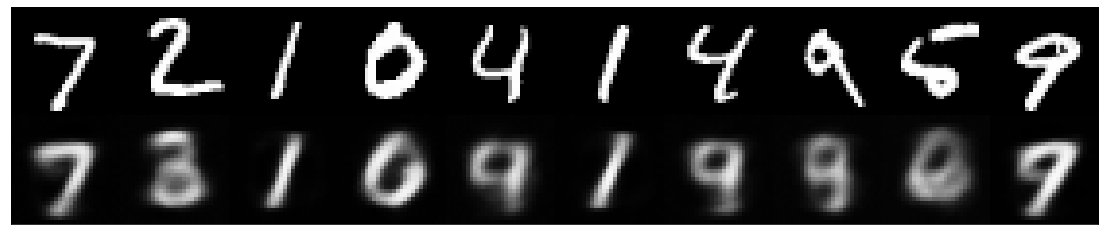

60000/60000 [==============================] - 22s - loss: 0.1113 - val_loss: 0.0991
Epoch 17/20
60000/60000 [==============================] - 21s - loss: 0.1093 - val_loss: 0.0976
Epoch 18/20
60000/60000 [==============================] - 21s - loss: 0.1077 - val_loss: 0.0962
Epoch 19/20
60000/60000 [==============================] - 21s - loss: 0.1062 - val_loss: 0.0948
Epoch 20/20
60000/60000 [==============================] - 21s - loss: 0.1048 - val_loss: 0.0937


In [ ]:
# Запуск обучения 
vae.fit(x_train, x_train, shuffle=True, epochs=20,
        batch_size=batch_size,
        validation_data=(x_test, x_test),
        callbacks=[pltfig],
        verbose=1) # грузим наши данные в модель, задаем параметры и обучаем

In [ ]:
encoder_mean.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (500, 28, 28, 1)          0         
_________________________________________________________________
flatten_1 (Flatten)          (500, 784)                0         
_________________________________________________________________
dense_1 (Dense)              (500, 256)                200960    
_________________________________________________________________
batch_normalization_1 (Batch (500, 256)                1024      
_________________________________________________________________
dropout_1 (Dropout)          (500, 256)                0         
_________________________________________________________________
dense_2 (Dense)              (500, 128)                32896     
_________________________________________________________________
batch_normalization_2 (Batch (500, 128)                512       
__________

In [ ]:
def plot_images(generator, examples=10, dim=(10,10), figsize=(15,15)): # функция добавляет шум на скрытом пространстве
    k = 1.1
    noise = np.random.normal(loc=0, scale=1, size=[1, latent_dim]) # создаем шум нормальным распределением
    
    im_arr = [generator.predict((k**i)*noise) for i in range(0,examples)] # получаем сгенеренные выходные картинки над заданным шумом
    im_arr = np.array(im_arr).reshape(examples,28,28) # переводим в numpy массив, подгоняем размеры

    plt.figure(figsize=figsize) # задаем способ отрисовки картинок
    for i in range(im_arr.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(im_arr[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()

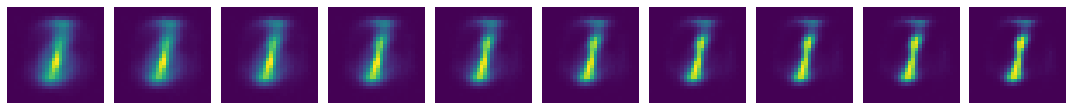

In [ ]:
plot_images(generator) # отрисовываем картинки

In [ ]:
def plot_images_two_points(generator, examples=10, dim=(10,10), figsize=(15,15)):
    
    noise1 = 1*np.random.normal(loc=0, scale=1, size=[1, latent_dim]) # создаем первое случайное зашумленное распределение
    noise2 = 1*np.random.normal(loc=0, scale=1, size=[1, latent_dim]) # создаем второе случайное зашумленное распределение
    
    # получаем сгенеренные выходные картинки плавным переходом от одного зашумленного к другому 
    im_arr = [generator.predict(i*noise2/(examples-1) + (examples-i-1)*noise1/(examples-1)) for i in range(0,examples)]
    im_arr = np.array(im_arr).reshape(examples,28,28) # переводим в numpy массив, подгоняем размеры

    plt.figure(figsize=figsize) # задаем способ отрисовки картинок
    for i in range(im_arr.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(im_arr[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()

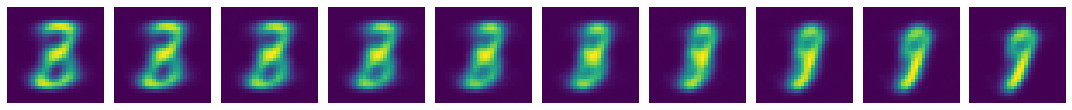

In [ ]:
plot_images_two_points(generator) # отрисовываем картинки

In [ ]:
z_imgs = models['encoder'].predict(x_test[:500], batch_size=500)

In [ ]:
print(z_imgs.shape)

(500, 10)


In [ ]:
def plot_images_two_points2(generator, z_imgs, examples=10, dim=(10,10), figsize=(15,15)):
    
    index1 = int(round(200*np.random.sample(1)[0])) # запишем в первый индекс случайно сгенерированное значение
    index2 = int(round(200*np.random.sample(1)[0])) # запишем во второй индекс случайно сгенерированное значение
    noise1 = z_imgs[index1,:].reshape(1,10) # сгенерируем первую зашумленную картинку по полученному индексу
    noise2 = z_imgs[index2,:].reshape(1,10) # сгенерируем вторую зашумленную картинку по полученному индексу
    
    # получаем сгенеренные выходные картинки плавным переходом от одного зашумленного к другому 
    im_arr = [generator.predict(i*noise2/(examples-1) + (examples-i-1)*noise1/(examples-1)) for i in range(0,examples)]
    im_arr = np.array(im_arr).reshape(examples,28,28) # переводим в numpy массив, подгоняем размеры

    plt.figure(figsize=figsize) # задаем способ отрисовки картинок
    for i in range(im_arr.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(im_arr[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()

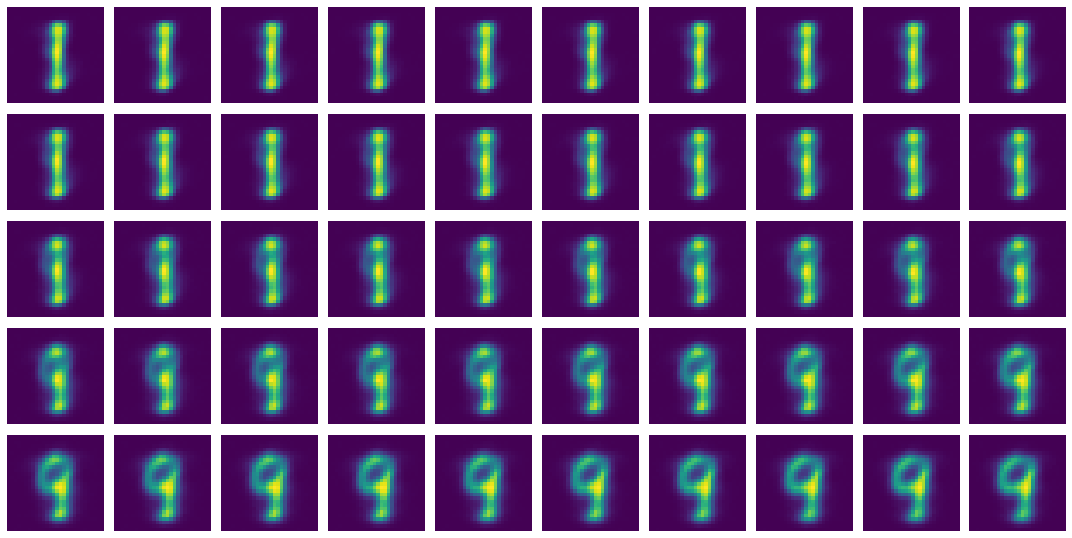

In [ ]:
plot_images_two_points2(generator, z_imgs, examples=50) # отрисовываем картинки

# CVAE

*Теоретический материал:* https://youtu.be/b0MYIcNjNPA?t=7538

*Разбор данного раздела:* https://youtu.be/b0MYIcNjNPA?t=7665

In [ ]:
!pip install keras==2.0 -q # загружаем эту версию кераса для корректной работы скрипта
!pip install tensorflow==1.0 -q  # загружаем эту версию тензорфлоу  для корректной работы скрипта

     |████████████████████████████████| 194kB 8.7MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.0.0 which is incompatible.
     |████████████████████████████████| 44.5MB 76kB/s 


In [ ]:
import sys # модуль содержит параметры и функции, которые относятся к Python и его среде
import numpy as np # загружаем библиотеку для работы с массивами данных
import matplotlib.pyplot as plt # из библиотеки для визуализации данных возьмём интерфейс для построения графиков простых функций
%matplotlib inline
from scipy.stats import norm # модуль с нормальными непрерывными случайными величинами
# import seaborn as sns

from keras.datasets import mnist # загружаем готовую стандартную базу рукописных цифр mnist
from keras.utils import to_categorical # загружаем утилиты кераса для one-hot кодировки
from keras.layers import Input, Dense # загружаем необходимые слои(входной, полносвязный)
from keras.layers import BatchNormalization, Dropout, Flatten, Reshape, Lambda # загружаем слои(нормализации, регуляризации и т.д)
from keras.layers import concatenate # подгружаем слой конкатенации
from keras.models import Model # загружаем абстрактный класс базовой модели сети от кераса 
from keras.objectives import binary_crossentropy # импортируем функцию потерь
from keras.layers.advanced_activations import LeakyReLU # импортируем функцию активации
from keras import backend as K # устанавливаем переменную для окружения кераса
from keras.optimizers import Adam, RMSprop # загружаем выбранные оптимизаторы
from IPython.display import clear_output # импортируем модуль очистки output'а ячейки
from keras.callbacks import LambdaCallback, ReduceLROnPlateau, TensorBoard # импортируем коллбэки

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:473: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:474: FutureWarn

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # загружаем данные из базы mnist с разбивкой на train/test
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255. # представляем x_train в виде значений от 0 до 1
x_test  = x_test .astype('float32') / 255. # представляем x_test в виде значений от 0 до 1
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) # меняем форму, приводим к нужным нам размерам
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1)) # меняем форму, приводим к нужным нам размерам

y_train_cat = to_categorical(y_train).astype(np.float32) # переводим обучающие лейблы в one-hot кодировку
y_test_cat  = to_categorical(y_test).astype(np.float32) # переводим проверочные лейблы в one-hot кодировку
num_classes = y_test_cat.shape[1] # задаем количество классов

In [ ]:
batch_size = 500 # размер батча
latent_dim = 8 # размер скрытого слоя/пространства
dropout_rate = 0.3 # размер слоя регуляризации, "выключим" указанное количество нейронов, во избежание переобучения
start_lr = 0.001 # шаг обучения

In [ ]:

def create_cvae(): # объявляем функцию создания вариационного автокодировщика c условием
    models = {} # задаем словарь моделей

    # Добавим Dropout и BatchNormalization
    def apply_bn_and_dropout(x): # функция будет принимать на вход слой x
        return Dropout(dropout_rate)(BatchNormalization()(x)) # и применять к нему регуляризацию/нормализацию

    # Энкодер
    input_img = Input(shape=(28, 28, 1)) # размерности строк, столбцов, фильтров одной картинки
    flatten_img = Flatten()(input_img) # добавляем слой выравнивания/сглаживания ("сплющиваем" данные в вектор)
    input_lbl = Input(shape=(num_classes,), dtype='float32') # второй вход в энкодер с учетом лейблов и по количеству классов

    x = concatenate([flatten_img, input_lbl]) # конкатенируем входы сглаженной входной картинки и input_lbl
    
    x = Dense(256, activation='relu')(x) # полносвязный слой на 256 нейронов
    
    x = apply_bn_and_dropout(x) # применяем функцию добавления регуляризации/нормализации
    
    # Предсказываем параметры распределений
    
    # Вместо того чтобы предсказывать стандартное отклонение, предсказываем логарифм вариации
    z_mean = Dense(latent_dim)(x) # скрытое пространство(мат.ожидание) размером 8
    z_log_var = Dense(latent_dim)(x) # скрытое пространство(лог.вариации) размером 8

    # Сэмплирование из Q с трюком репараметризации
    def sampling(args): # обьявляем функцию сэмплирования
        z_mean, z_log_var = args # принимаем в аргументах z_mean, z_log_var, раскусываем их
        # керасовским методом делаем нормальное распределение(500 8мерных), мат.ожидание 0, ст.отклонение 1
        epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.0)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    # задаем самописный слой, к-й принимает лист [z_mean, z_log_var], семплирует, и на выходе выдает размерность (8,)
    l = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var]) 

    models["encoder"]  = Model([input_img, input_lbl], l, 'Encoder') # модель энкодера от входов до лямбда слоя
    models["z_meaner"] = Model([input_img, input_lbl], z_mean, 'Enc_z_mean') # отдельная модель с путем от входов до z_mean
    models["z_lvarer"] = Model([input_img, input_lbl], z_log_var, 'Enc_z_log_var') # отдельная модель с путем от входов до z_log_var

    # Декодер
    z = Input(shape=(latent_dim, )) # задаем первую входную размерность (8,)
    input_lbl_d = Input(shape=(num_classes,), dtype='float32') # задаем вторую входную размерность по номеру классов
    x = concatenate([z, input_lbl_d]) # конкатенируем входы
    x = Dense(256)(x) # полносвязный слой на 256 нейронов
    x = LeakyReLU()(x) # применяем функцию активации отдельным слоем
    x = apply_bn_and_dropout(x) # применяем функцию добавления регуляризации/нормализации
    x = Dense(28*28, activation='sigmoid')(x) # полносвязный слой на 784 нейрона
    decoded = Reshape((28, 28, 1))(x) # меняем форму, приводим к нужным нам размерам

    models["decoder"] = Model([z, input_lbl_d], decoded, name='Decoder') # собираем модель декодера
    
    # Cобираем вариационный автокодировщик с условием(3 инпута на входе, затем первые два проходят через энкодер,
    # складываются с input_lbl_d и всё это проходит через декодер на выходе)
    models["cvae"]    = Model([input_img, input_lbl, input_lbl_d], 
                              models["decoder"]([models["encoder"]([input_img, input_lbl]), input_lbl_d]), 
                              name="CVAE")
    # Та же операция, но вместо энкодера модель z_meaner
    models["style_t"] = Model( [input_img, input_lbl, input_lbl_d] , 
                               models["decoder"] ( [models["z_meaner"]([input_img, input_lbl]), input_lbl_d] ) , 
                               name="style_transfer")
    
    
    def vae_loss(x, decoded): # объявляем самописную функцию потерь
        x = K.reshape(x, shape=(batch_size, 28*28)) # меняем размеры(в одномерный) x через керасовскую функцию
        decoded = K.reshape(decoded, shape=(batch_size, 28*28)) # меняем размеры(в одномерный) decoded через керасовскую функцию
        xent_loss = 28*28*binary_crossentropy(x, decoded) # берем бинарную кроссэнтропию между x и decoded, с учетом пикселей
        kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1) # по формуле устанавливаем ошибку kl_loss
        return (xent_loss + kl_loss)/2/28/28 # функция вернет суммарную ошибку с учетом распределения и размеров пикселей

    return models, vae_loss

models, vae_loss = create_cvae() # получаем модели и свою функцию потерь
cvae = models["cvae"] # задаем модель вариационного автокодировщика с условием

In [ ]:
cvae.compile(optimizer = Adam(start_lr), loss=vae_loss) # компилируем модель с выбранным оптимайзером и своей функцией потерь

In [ ]:
digit_size = 28 # задаем размеры цифр
def plot_digits(*args, invert_colors=False): # функция отрисует две линии картинок - оригинальные и выходные из автокодировщика
    args = [x.squeeze() for x in args] # удаляем оси с одним элементом из аргументов
    n = min([x.shape[0] for x in args]) # берем минимальное от нулевой оси x'ов в аргументах
    figure = np.zeros((digit_size * len(args), digit_size * n)) # создаем фигуру с использованием массива нулей по заданным размерам

    for i in range(n):
        for j in range(len(args)): # заполняем фигуру значениями
            figure[j * digit_size: (j + 1) * digit_size,
                   i * digit_size: (i + 1) * digit_size] = args[j][i].squeeze()

    if invert_colors: # если значение invert_colors будет True
        figure = 1-figure # то фигуру делаем обратной

    plt.figure(figsize=(2*n, 2*len(args))) # плотим фигуру с заданными значениями
    plt.imshow(figure, cmap='Greys_r') # выведем ее на экран в указанных цветах
    plt.grid(False) # указываем, что сетка не нужна
    ax = plt.gca() # получаем текущий объект Axes
    ax.get_xaxis().set_visible(False) # ось координат xaxis делаем невидимой
    ax.get_yaxis().set_visible(False) # ось координат yaxis делаем невидимой
    plt.show() # выводим отрисованное на экран


n = 15 # Картинка с 15x15 цифр


## Обучение

In [ ]:
# Эпохи, в которые будем сохранять
save_epochs = set([i*5 for i in range(0,25)])

# Отслеживать будем на вот этих цифрах
imgs = x_test[:batch_size]
imgs_lbls = y_test_cat[:batch_size]
n_compare = 10

# Модели
generator      = models["decoder"]
encoder_mean   = models["z_meaner"]


# Функция, которую будем запускать после каждой эпохи
def on_epoch_end(epoch, logs):
    if epoch in save_epochs:
        clear_output() # Не захламляем output

        # Сравнение реальных и декодированных цифр
        decoded = cvae.predict([imgs, imgs_lbls, imgs_lbls], batch_size=batch_size)
        plot_digits(imgs[:n_compare], decoded[:n_compare])



# Коллбэки
pltfig = LambdaCallback(on_epoch_end=on_epoch_end)
# lr_red = ReduceLROnPlateau(factor=0.1, patience=25)
tb     = TensorBoard(log_dir='./logs')

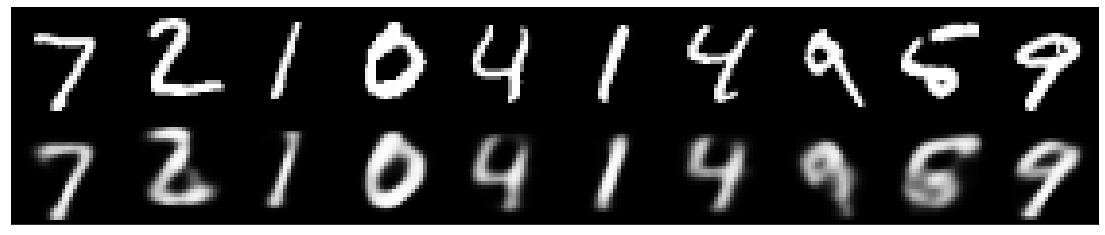

60000/60000 [==============================] - 17s - loss: 0.0824 - val_loss: 0.0762
Epoch 17/20
60000/60000 [==============================] - 17s - loss: 0.0822 - val_loss: 0.0759
Epoch 18/20
60000/60000 [==============================] - 17s - loss: 0.0821 - val_loss: 0.0758
Epoch 19/20
60000/60000 [==============================] - 17s - loss: 0.0820 - val_loss: 0.0756
Epoch 20/20
60000/60000 [==============================] - 17s - loss: 0.0819 - val_loss: 0.0758


In [ ]:
# Запуск обучения 
cvae.fit([x_train, y_train_cat, y_train_cat], x_train, shuffle=True, epochs=20,
         batch_size=batch_size,
         validation_data=([x_test, y_test_cat, y_test_cat], x_test),
         callbacks=[pltfig, tb],
         verbose=1) # грузим наши данные в модель, задаем параметры и обучаем

## Результат обучения

*Разбор данного раздела:* https://youtu.be/b0MYIcNjNPA?t=7832

In [ ]:
def style_transfer(model, X, lbl_in, lbl_out): # объявляем функцию переноса стилей
    rows = X.shape[0] 
    if isinstance(lbl_in, int): # заполняем входные лейблы(энкодера)
        lbl = lbl_in 
        lbl_in = np.zeros((rows, 10)) # построчное заполнение нулями от 0 до 9
        lbl_in[:, lbl] = 1 # заполняем в нужную строчку единицу
    if isinstance(lbl_out, int): # заполняем выходные лейблы(декодера)
        lbl = lbl_out
        lbl_out = np.zeros((rows, 10)) # построчное заполнение нулями от 0 до 9
        lbl_out[:, lbl] = 1 # заполняем в нужную строчку единицу
    #print(lbl_in)
    #print(lbl_out)
    return model.predict([X, lbl_in, lbl_out]) # функция вернет предсказанные картинки

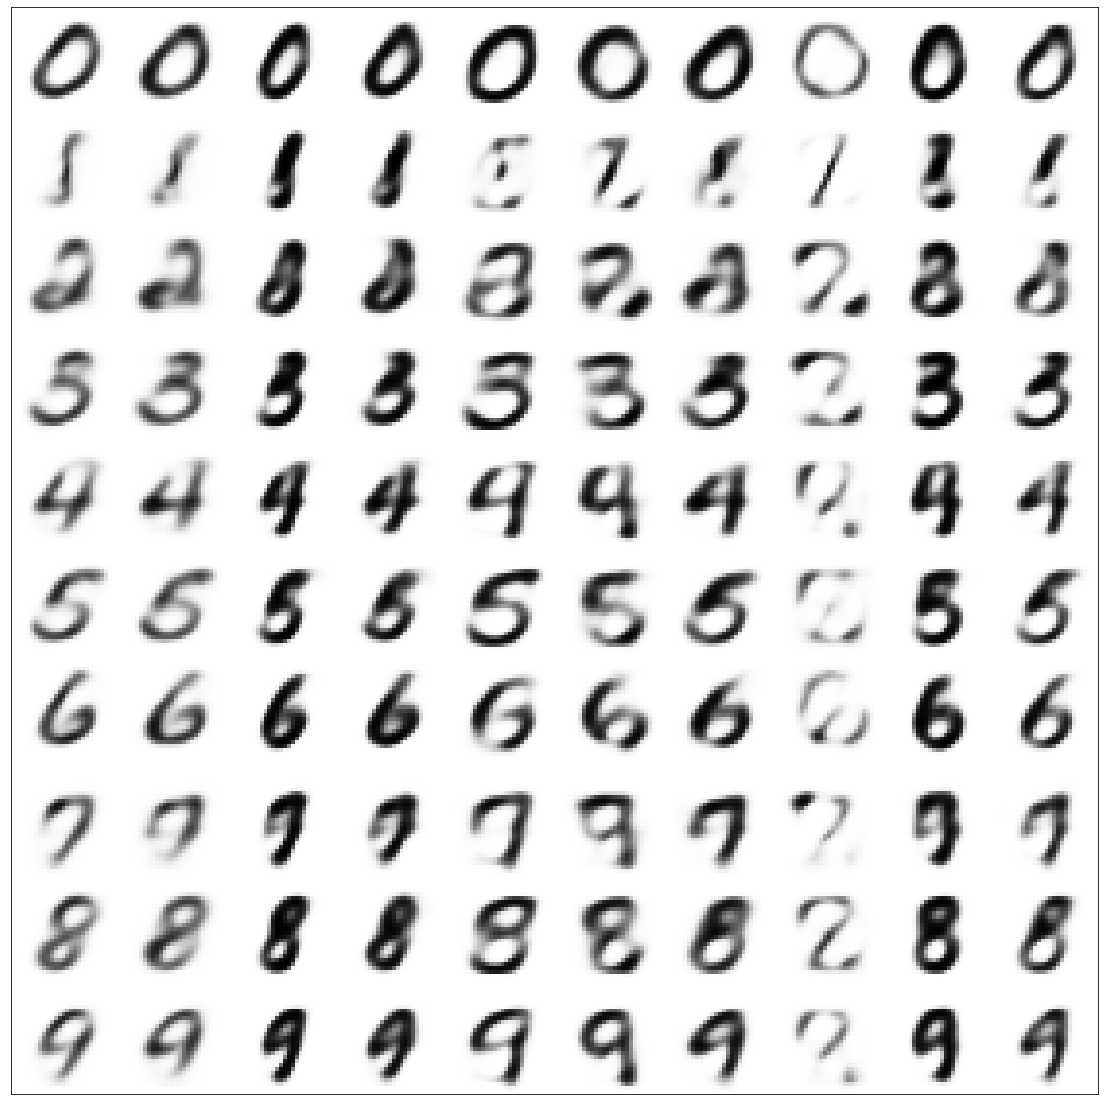

In [ ]:
n = 10 # выбираем количество картинок
lbl = 0 # выбираем лейбл
generated = [] # здесь соберем список сгенерированных картинок
prot = x_train[y_train == lbl][:n] # возьмем prot в качестве x с соответствующим выбранному значению лейбла 

for i in range(num_classes): # идем по каждому классу
    generated.append(style_transfer(models["style_t"], prot, lbl, i)) # и генерим картинки с учетом переноса стиля

#generated[lbl] = prot
plot_digits(*generated, invert_colors=True) # отрисовываем картинки